/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.94
Confusion Matrix:
[[ 84   7]
 [  5 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        91
           1       0.94      0.95      0.95       109

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

ROC-AUC Score: 0.99


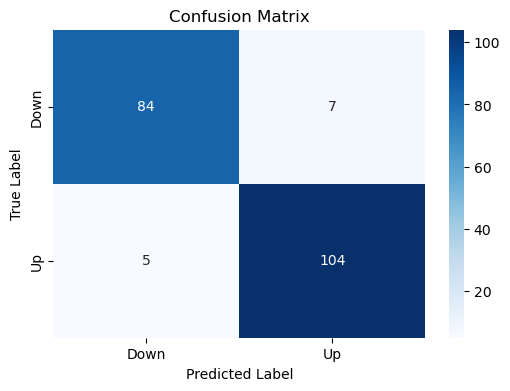

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Simulating Stock Market Data
np.random.seed(42)

data_size = 1000
opening_price = np.random.uniform(100, 500, data_size)  # Opening price between $100 and $500
closing_price = opening_price + np.random.randn(data_size) * 5  # Closing price with slight variation
volume = np.random.randint(10000, 1000000, data_size)  # Random trade volume
high_price = closing_price + np.random.rand(data_size) * 2  # Daily high
low_price = opening_price - np.random.rand(data_size) * 2  # Daily low

# Creating the target variable (1 if stock went up, 0 if it went down or stayed the same)
movement = (closing_price > opening_price).astype(int)

# Creating a DataFrame
df = pd.DataFrame({
    'Opening Price': opening_price,
    'Closing Price': closing_price,
    'High Price': high_price,
    'Low Price': low_price,
    'Volume': volume,
    'Movement': movement  # Target Variable
})

# Defining features (X) and target (y)
X = df[['Opening Price', 'High Price', 'Low Price', 'Volume']]
y = df['Movement']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Displaying results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Visualizing the Confusion Matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()